# Importing Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Momentum studies based on the book "Dual Momentum Investing: An Innovative Strategy for Higher Returns with Lower Risk", by Gary Antonacci.

The aim of this study was to use the core concept of momentum from the book (mainly trailing X months positive return) applied to brazilian market .

In [2]:
# Dual momentum algorithm proposed by the book
Image(url="images/GEM_rules.jpg", width=300, height=200)

# Data preparation (Brazilian IBOV index)

## Downloading data

In [3]:
df = yf.download("^BVSP", interval="1mo")

[*********************100%***********************]  1 of 1 completed


## Drop unnecessary data

In [4]:
df.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)

## Defining trailling month positive return criteria

In [5]:
df["ttm"] = df["Adj Close"].pct_change(periods=12)

## Creating return column

In [6]:
df["monthly_pct"] = df["Adj Close"].pct_change()

In [7]:
df.head(25)

,Adj Close,ttm,monthly_pct
Date,,,
1993-05-01,34.900002,NaN,NaN
1993-06-01,53.700001,NaN,0.538682
1993-07-01,65.599998,NaN,0.221601
1993-08-01,96.400002,NaN,0.469512
1993-09-01,146.600006,NaN,0.520747
1993-10-01,184.399994,NaN,0.257844
1993-11-01,274.000000,NaN,0.485900
1993-12-01,375.500000,NaN,0.370438
1994-01-01,740.599976,NaN,0.972304


## Creating boolean auxiliary column to determine if the trailing X-months returns of the index was positive (1) or not (0)

In [8]:
df["ttm_positive"] = df.apply(lambda x: 1 if x["ttm"] > 0 else 0, axis=1)

## Plotting the distribution of the monthly returns and calculating its skew.

Skew of the returns distribution: 2.27 



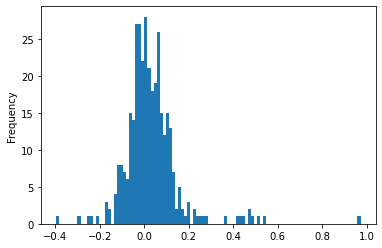

In [9]:
print("Skew of the returns distribution:", round(df["monthly_pct"].skew(), 2), "\n")
df["monthly_pct"].plot(kind="hist", bins=100);

In [10]:
df.dropna(inplace=True)

In [11]:
df

,Adj Close,ttm,monthly_pct,ttm_positive
Date,,,,
1994-05-01,2467.199951,69.693405,0.444158,1
1994-06-01,3623.199951,66.471134,0.468547,1
1994-07-01,4201.299805,63.044206,0.159555,1
1994-08-01,5329.500000,54.285269,0.268536,1
1994-09-01,5484.000000,36.407911,0.028990,1
...,...,...,...,...
2022-04-01,107876.000000,-0.092671,-0.101026,0
2022-05-01,111351.000000,-0.117774,0.032213,0
2022-06-01,98542.000000,-0.222867,-0.115033,0


## Creating returns of the momentum criteria using the auxiliary boolean column

In [12]:
df["momentum_ret"] = df.apply(lambda x: x["monthly_pct"] if x["ttm_positive"] > 0 else 0, axis=1)

# Plotting the result of the momentum strategy vs. the index itself

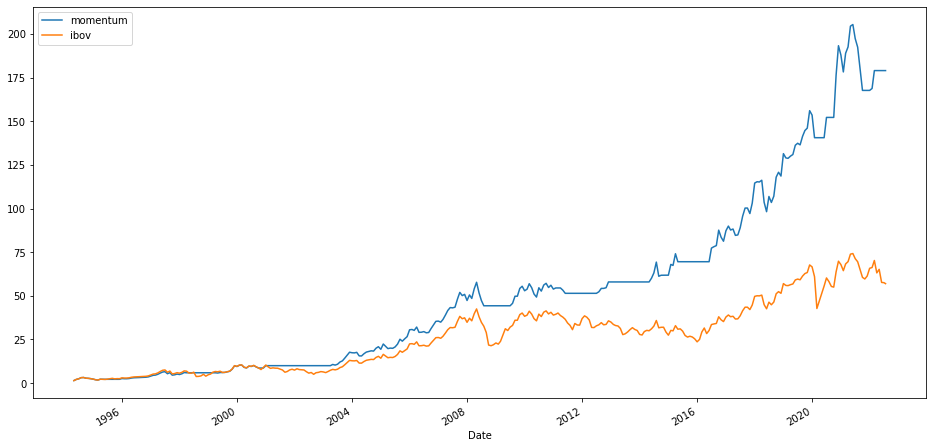

In [13]:
plt.figure(figsize=(16,8))
np.cumprod(1 + df["momentum_ret"]).plot(label="momentum")
np.cumprod(1 + df["monthly_pct"]).plot(label="ibov")
plt.legend();

## Plotting the monthly returns of the momentum investing approach along with its skew.

Skew of the returns distribution: 1.84 



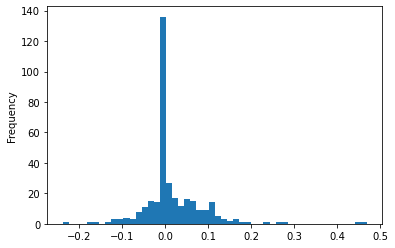

In [14]:
print("Skew of the returns distribution:", round(df["momentum_ret"].skew(), 2), "\n")
df["momentum_ret"].plot(kind="hist", bins=50);